### Get all time related vectors from BehaviorSync and create some basic comparisons

In [6]:
import pathlib
from datetime import datetime
current_working_directory = pathlib.Path.cwd()
sync_results_folder = pathlib.Path(current_working_directory, 'sync_results')

sync_results_filename_base = 'time_comparison_stats_behaviorsync_wshift_'

sync_results_file = pathlib.Path(sync_results_folder, sync_results_filename_base+datetime.now().strftime('%Y%m%d')+'.pkl')
sync_results_file


PosixPath('/mnt/cup/braininit/Shared/repos/TestU19PipelinePython/U19-pipeline-python/notebooks/ephys_element/ephys_sync_notebooks/sync_results/time_comparison_stats_behaviorsync_wshift_20260219.pkl')

In [ ]:

from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()


In [2]:
import u19_pipeline.ephys_pipeline as ep
import u19_pipeline.utils.ephys_utils as ephys_utils
import u19_pipeline.recording as recording
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import numpy as np


[2026-02-18 17:29:31,488][INFO]: DataJoint 0.14.4 connected to alvaros@datajoint00.pni.princeton.edu:3306


#### Select recording_ids to fetch from

In [23]:
recording_query = "recording_id > 350 and recording_id < 1000"
recording = dj.create_virtual_module('recording', 'u19_recording')

sync_records = pd.DataFrame((ep.BehaviorSync & recording_query).fetch('recording_id', 'sync_data', 'block_sync', as_dict=True))

session_fields = ['subject_fullname', 'session_date', 'session_number']
session_keys = (recording.Recording.BehaviorSession & recording_query).fetch(*session_fields, as_dict=True, order_by='recording_id')

session_plus_recording_keys = pd.DataFrame((recording.Recording.BehaviorSession & recording_query).fetch(as_dict=True, order_by='recording_id'))
behavior = dj.create_virtual_module('behavior','u19_behavior')
behavior_time_records = pd.DataFrame((behavior.SpatialTimeBlobs & session_keys).fetch(*session_fields, 'iteration_matrix',as_dict=True))





In [24]:
all_data = pd.merge(session_plus_recording_keys, sync_records)
all_data = pd.merge(all_data, behavior_time_records)
all_data['block_sync'] = all_data['block_sync'].fillna(value=np.nan)


all_data['session_date'] = all_data['session_date'].astype(str)
all_data['trial_time'] = np.nan
all_data['cumulative_session_time'] = np.nan
all_data['trial_time'] = all_data['trial_time'].astype('object')
all_data['cumulative_session_time'] = all_data['cumulative_session_time'].astype('object')
for i in range(all_data.shape[0]):
    behavior_session = all_data.loc[i,session_fields].to_dict()
    print(behavior_session)
    behavior_time, behavior_fullsession = ephys_utils.get_real_behavior_time(behavior_session)
    all_data.loc[[i],'trial_time'] = pd.Series([behavior_time], all_data.index[[i]])
    all_data.loc[[i],'cumulative_session_time'] = pd.Series([behavior_fullsession], all_data.index[[i]])

all_data

{'subject_fullname': 'jyanar_ya014', 'session_date': '2024-07-25', 'session_number': 0}


{'subject_fullname': 'jyanar_ya014', 'session_date': '2024-07-26', 'session_number': 0}
{'subject_fullname': 'jyanar_ya014', 'session_date': '2024-07-27', 'session_number': 0}
{'subject_fullname': 'jyanar_ya013', 'session_date': '2024-07-06', 'session_number': 0}
{'subject_fullname': 'jk8386_jk44', 'session_date': '2024-08-07', 'session_number': 2}
{'subject_fullname': 'jk8386_jk44', 'session_date': '2024-08-08', 'session_number': 0}
{'subject_fullname': 'jk8386_jk44', 'session_date': '2024-08-09', 'session_number': 0}
{'subject_fullname': 'ms81_M029', 'session_date': '2024-08-22', 'session_number': 0}
{'subject_fullname': 'ms81_M029', 'session_date': '2024-08-23', 'session_number': 0}
{'subject_fullname': 'ms81_M029', 'session_date': '2024-08-27', 'session_number': 0}
{'subject_fullname': 'ms81_M029', 'session_date': '2024-08-28', 'session_number': 0}
{'subject_fullname': 'ms81_M029', 'session_date': '2024-08-29', 'session_number': 0}
{'subject_fullname': 'ms81_M029', 'session_date': 

,recording_id,subject_fullname,session_date,session_number,sync_data,block_sync,iteration_matrix,trial_time,cumulative_session_time
0,351,jyanar_ya014,2024-07-25,0,"{'trial_idx_vector': [90594, 191136, 241664, 2...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.022003399208188057, 0.030528400093317032, ...","[0.022003399208188057, 0.030528400093317032, 0..."
1,352,jyanar_ya014,2024-07-26,0,"{'trial_idx_vector': [96301, 175907, 219992, 2...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.04882429912686348, 0.05968350172042847, 0....","[0.04882429912686348, 0.05968350172042847, 0.0..."
2,353,jyanar_ya014,2024-07-27,0,"{'trial_idx_vector': [146686, 245890, 288507, ...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.02462569996714592, 0.03497710078954697, 0....","[0.02462569996714592, 0.03497710078954697, 0.0..."
3,354,jyanar_ya013,2024-07-06,0,"{'trial_idx_vector': [101243, 1110280, 1516109...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.022056300193071365, 0.030090199783444405, ...","[0.022056300193071365, 0.030090199783444405, 0..."
4,355,jk8386_jk44,2024-08-07,2,"{'trial_idx_vector': [386104, 435365, 510851, ...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.038020599633455276, 0.05243790149688721, 0...","[0.038020599633455276, 0.05243790149688721, 0...."
...,...,...,...,...,...,...,...,...,...
257,612,jyanar_ya062,2026-02-03,0,"{'trial_idx_vector': [1304663, 1627821, 190837...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.09886489808559418, 0.17013849318027496, 0....","[0.09886489808559418, 0.17013849318027496, 0.2..."
258,613,jyanar_ya062,2026-02-04,0,"{'trial_idx_vector': [1313701, 1653176, 196350...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.10614579916000366, 0.17466479539871216, 0....","[0.10614579916000366, 0.17466479539871216, 0.2..."
259,614,jk8386_jknpx6,2026-02-03,0,"{'trial_idx_vector': [79512, 134470, 210992, 2...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.04648039862513542, 0.05231520161032677, 0....","[0.04648039862513542, 0.05231520161032677, 0.0..."
260,615,jk8386_jknpx7,2026-02-03,0,"{'trial_idx_vector': [54088, 1051721, 1169643,...",NaN,"[[1.0, 1.0, 1.0], [1.0, 1.0, 2.0], [1.0, 1.0, ...","[[0.011287200264632702, 0.016702799126505852, ...","[0.011287200264632702, 0.016702799126505852, 0..."


In [ ]:

stats_list = []
for i in range(all_data.shape[0]):

    stats_dict = all_data.loc[i,['recording_id', 'subject_fullname', 'session_date', 'session_number']].to_dict().copy()

    all_vectors = ep.get_full_vectors_from_key({'recording_id': all_data.loc[i,'recording_id']}, apply_behavior_shift=True, behavior_time=all_data.loc[i,'trial_time'])

    time_as_behavior_fullsession = np.concatenate(([x for x in all_vectors['time_as_behavior_fullsession']]), axis=0) 
    time_as_behavior_trial_ind = np.concatenate(([x for x in all_vectors['time_as_behavior_trial_ind']]), axis=0) 

    time_as_behavior_fullsession_v = np.concatenate(([x for x in all_vectors['time_as_behavior_fullsession_virmen']]), axis=0) 
    time_as_behavior_trial_ind_v = np.concatenate(([x for x in all_vectors['time_as_behavior_trial_ind_virmen']]), axis=0) 

    behavior_time_trial_time = np.concatenate(all_data.loc[i, 'trial_time'])
    behavior_cumulative_session_time = all_data.loc[i, 'cumulative_session_time']
    
    if not np.isnan(all_data.loc[i, 'block_sync']):
        idx_behavior_time = all_data.loc[i, 'iteration_matrix'][:,0] == all_data.loc[i, 'block_sync']

        behavior_time_trial_time = behavior_time_trial_time.squeeze()
        behavior_time_trial_time = behavior_time_trial_time[idx_behavior_time]

        behavior_cumulative_session_time = behavior_cumulative_session_time.squeeze()
        behavior_cumulative_session_time = behavior_cumulative_session_time[idx_behavior_time]

    diff_shape_vectors = behavior_time_trial_time.squeeze().shape[0] - time_as_behavior_trial_ind.shape[0]

    if diff_shape_vectors != 0 and diff_shape_vectors < 2000:
        print('too few iteration diff, probably last trial incomplete')

        behavior_time_trial_time = behavior_time_trial_time.squeeze()
        print(behavior_time_trial_time.shape[0])
        behavior_time_trial_time = behavior_time_trial_time[:time_as_behavior_trial_ind.shape[0]]
        time_as_behavior_trial_ind_v = time_as_behavior_trial_ind_v[:time_as_behavior_trial_ind.shape[0]]
        time_as_behavior_fullsession_v = time_as_behavior_fullsession_v[:time_as_behavior_trial_ind.shape[0]]

        print(behavior_time_trial_time.shape[0])

        behavior_cumulative_session_time = behavior_cumulative_session_time.squeeze()
        behavior_cumulative_session_time = behavior_cumulative_session_time[:time_as_behavior_trial_ind.shape[0]]

        diff_shape_vectors = 0
        

    if diff_shape_vectors == 0:

        diff_time_trial_ind = time_as_behavior_trial_ind - behavior_time_trial_time.squeeze()
        diff_time_trial_ind_v = time_as_behavior_trial_ind_v - behavior_time_trial_time.squeeze() 

        
        diff_time_trial_full_session = time_as_behavior_fullsession - (behavior_cumulative_session_time.squeeze() - behavior_cumulative_session_time[0])
        diff_time_trial_full_session_v = time_as_behavior_fullsession_v - (behavior_cumulative_session_time.squeeze() - behavior_cumulative_session_time[0])

        diff_times_trial_inds = time_as_behavior_trial_ind_v - time_as_behavior_trial_ind

        stats_dict['last_diff_trial_ind'] = diff_time_trial_ind[-1].copy()
        stats_dict['last_diff_trial_ind_v'] = diff_time_trial_ind_v[-1].copy()
        stats_dict['last_diff_trial_inds'] = diff_times_trial_inds[-1].copy()

        stats_dict['last_diff_time_trial_full_session'] = diff_time_trial_full_session[-1].copy()
        stats_dict['last_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v[-1].copy()

        diff_time_trial_ind = diff_time_trial_ind[:-1]
        diff_time_trial_ind_v = diff_time_trial_ind_v[:-1]
        diff_times_trial_inds = diff_times_trial_inds[:-1]
        diff_time_trial_full_session = diff_time_trial_full_session[:-1]
        diff_time_trial_full_session_v = diff_time_trial_full_session_v[:-1]

        stats_dict['max_diff_time_trial_ind'] = diff_time_trial_ind.max()
        stats_dict['max_diff_time_trial_ind_v'] = diff_time_trial_ind_v.max()
        stats_dict['max_diff_time_trial_inds'] = diff_times_trial_inds.max()
        stats_dict['max_diff_time_trial_full_session'] = diff_time_trial_full_session.max()
        stats_dict['max_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.max()

        stats_dict['min_diff_time_trial_ind'] = diff_time_trial_ind.min()
        stats_dict['min_diff_time_trial_ind_v'] = diff_time_trial_ind_v.min()
        stats_dict['min_diff_time_trial_inds'] = diff_times_trial_inds.min()
        stats_dict['min_diff_time_trial_full_session'] = diff_time_trial_full_session.min()
        stats_dict['min_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.min()

        stats_dict['mean_diff_time_trial_ind'] = diff_time_trial_ind.mean()
        stats_dict['mean_diff_time_trial_ind_v'] = diff_time_trial_ind_v.mean()
        stats_dict['mean_diff_time_trial_inds'] = diff_times_trial_inds.mean()
        stats_dict['mean_diff_time_trial_full_session'] = diff_time_trial_full_session.mean()
        stats_dict['mean_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.mean()

        stats_dict['std_diff_time_trial_ind'] = diff_time_trial_ind.std()
        stats_dict['std_diff_time_trial_ind_v'] = diff_time_trial_ind_v.std()
        stats_dict['std_diff_time_trial_inds'] = diff_times_trial_inds.std()
        stats_dict['std_diff_time_trial_full_session'] = diff_time_trial_full_session.std()
        stats_dict['std_diff_time_trial_full_session_v'] = diff_time_trial_full_session_v.std()

        stats_dict['percent_little_diff_time_trial_ind'] = (np.sum(np.abs(diff_time_trial_ind) < 0.1)*100) / diff_time_trial_ind.shape[0]
        stats_dict['percent_little_diff_time_trial_ind_v'] = (np.sum(np.abs(diff_time_trial_ind_v) < 0.1)*100) / diff_time_trial_ind_v.shape[0]
        stats_dict['percent_little_diff_time_trial_inds'] = (np.sum(np.abs(diff_times_trial_inds) < 0.1)*100) / diff_times_trial_inds.shape[0]
        stats_dict['percent_little_diff_time_trial_full_session'] = (np.sum(np.abs(diff_time_trial_full_session) < 0.1)*100) / diff_time_trial_full_session.shape[0]
        stats_dict['percent_little_diff_time_trial_full_session_v'] = (np.sum(np.abs(diff_time_trial_full_session_v) < 0.1)*100) / diff_time_trial_full_session_v.shape[0]

        stats_dict['percent_very_little_diff_time_trial_ind'] = (np.sum(np.abs(diff_time_trial_ind) < 0.04)*100) / diff_time_trial_ind.shape[0]
        stats_dict['percent_very_little_diff_time_trial_ind_v'] = (np.sum(np.abs(diff_time_trial_ind_v) < 0.04)*100) / diff_time_trial_ind_v.shape[0]
        stats_dict['percent_very_little_diff_time_trial_inds'] = (np.sum(np.abs(diff_times_trial_inds) < 0.04)*100) / diff_times_trial_inds.shape[0]
        stats_dict['percent_very_little_diff_time_trial_full_session'] = (np.sum(np.abs(diff_time_trial_full_session) < 0.04)*100) / diff_time_trial_full_session.shape[0]
        stats_dict['percent_very_little_diff_time_trial_full_session_v'] = (np.sum(np.abs(diff_time_trial_full_session_v) < 0.04)*100) / diff_time_trial_full_session_v.shape[0]


        stats_list.append(stats_dict)

    else:
        print(i)
        print('session with probalby block syncing')
        print(stats_dict)
        print('diff_shape_vectors',diff_shape_vectors)
        print('behavior_time_trial_time.squeeze().shape[0]', behavior_time_trial_time.squeeze().shape[0])
        print('time_as_behavior_trial_ind.shape[0]', time_as_behavior_trial_ind.shape[0])


stats_df = pd.DataFrame(stats_list)

ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya014/20240725_g0/ya014_20240725_g0
5.605254201218486
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya014/20240726_g0/ya014_20240726_g0
6.007322305813432
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya014/20240727_g0/ya014_20240727_g0
6.85755530372262
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jyanar/jyanar_ya013/20240706_g0/ya013_20240706_g0
0.38031649868935347
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jk8386/jk8386_jk44/20240807_g2/jk44_08072024_g0
10.316227791830897
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jk8386/jk8386_jk44/20240808_g0/jk44_08082024_g0
9.344410305842757
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jk8386/jk8386_jk44/20240809_g0/jk44_08092024_g0
10.183213707059622
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/ms81/ms81_M029/20240822_g0/runtest_g0
5.580809300765395
ephys dir: /mnt

In [ ]:
stats_df.to_pickle(sync_results_file)
stats_df

,recording_id,subject_fullname,session_date,session_number,last_diff_trial_ind,last_diff_trial_ind_v,last_diff_trial_inds,last_diff_time_trial_full_session,last_diff_time_trial_full_session_v,max_diff_time_trial_ind,...,std_diff_time_trial_ind,std_diff_time_trial_ind_v,std_diff_time_trial_inds,std_diff_time_trial_full_session,std_diff_time_trial_full_session_v,percent_little_diff_time_trial_ind,percent_little_diff_time_trial_ind_v,percent_little_diff_time_trial_inds,percent_little_diff_time_trial_full_session,percent_little_diff_time_trial_full_session_v
0,351,jyanar_ya014,2024-07-25,0,0.000163,0.017963,0.017800,0.011720,0.029520,0.015381,...,0.003528,0.024018,0.022526,0.004940,0.024138,99.999001,99.752159,99.761153,99.999001,99.756156
1,352,jyanar_ya014,2024-07-26,0,-0.000783,0.015017,0.015800,0.018929,0.034729,0.007997,...,0.002528,0.023665,0.022159,0.004871,0.024112,99.998409,99.756867,99.764823,99.999045,99.761640
2,353,jyanar_ya014,2024-07-27,0,-0.001320,0.017479,0.018800,0.006992,0.025792,0.001384,...,0.002532,0.024535,0.022929,0.004382,0.024534,99.999456,99.763847,99.769832,99.999456,99.766567
3,354,jyanar_ya013,2024-07-06,0,-0.010513,-0.003713,0.006800,-0.022759,-0.015959,0.009688,...,0.002082,0.006913,0.006287,0.009960,0.012513,99.999083,99.983266,99.984183,99.999083,99.983266
4,355,jk8386_jk44,2024-08-07,2,-0.000917,0.025682,0.026600,0.021579,0.048178,0.007482,...,0.004141,0.018119,0.016326,0.006743,0.018817,99.984233,99.863926,99.872152,99.984233,99.869752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,612,jyanar_ya062,2026-02-03,0,-0.007355,0.016966,0.024321,0.052957,0.077278,1.552413,...,0.023652,0.061816,0.061481,0.026607,0.064191,99.921651,99.557493,99.513352,99.923306,99.034981
258,613,jyanar_ya062,2026-02-04,0,-0.011656,0.017384,0.029040,0.053173,0.082213,1.497997,...,0.022511,0.064225,0.064263,0.025256,0.066467,99.909523,99.528626,99.468866,99.908964,98.727178
259,614,jk8386_jknpx6,2026-02-03,0,-0.002784,0.008016,0.010800,-0.013563,-0.002763,0.003965,...,0.002222,0.015878,0.014567,0.007822,0.017152,99.999500,99.795776,99.802275,99.999500,99.797275
260,615,jk8386_jknpx7,2026-02-03,0,-0.001531,0.010269,0.011800,-0.013940,-0.002140,0.003912,...,0.002756,0.018612,0.016800,0.007139,0.018955,99.999493,99.734147,99.742510,99.999493,99.735161


#### "pulse only sync" Each trial individual time [0, ...] x ntrials 
#### Historgrams stats -- (behavior file - nidaq pulse signal). Each trial ind. time'

Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')

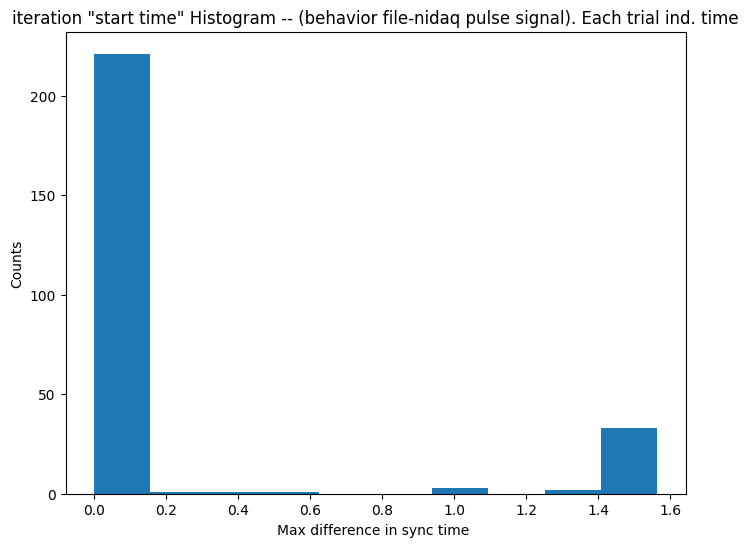

In [27]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['max_diff_time_trial_ind'])



plt.xlabel('Max difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Each trial ind. time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')

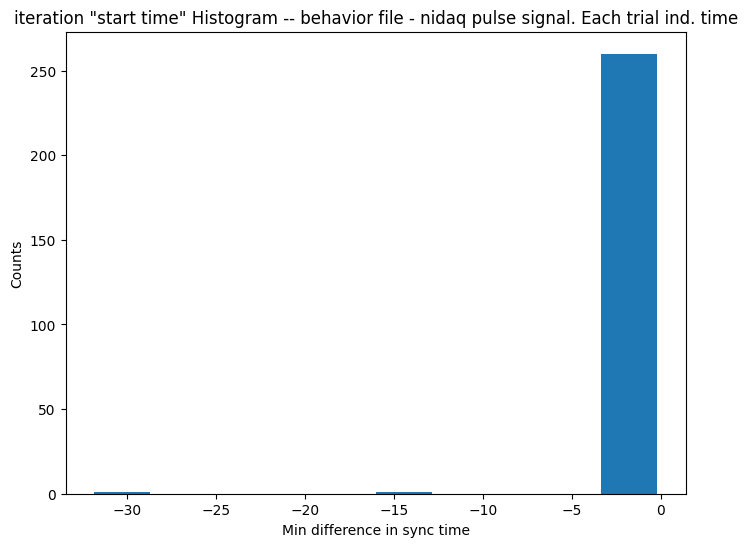

In [28]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['min_diff_time_trial_ind'])



plt.xlabel('Min difference in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')

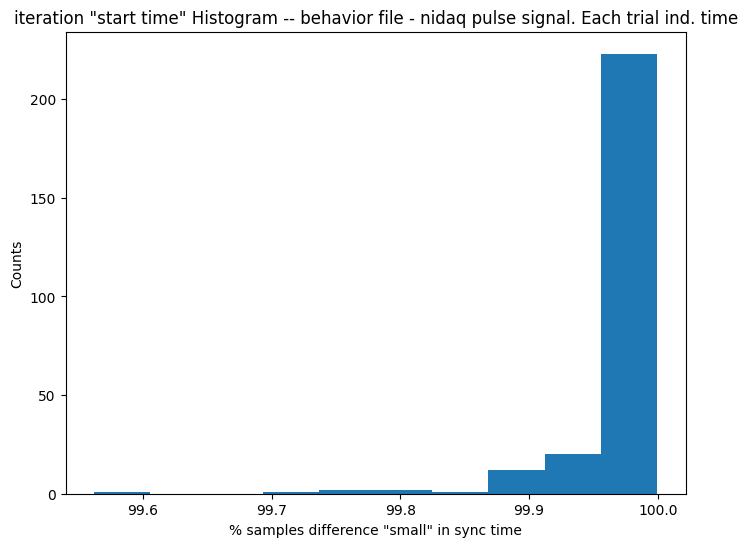

In [29]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['percent_little_diff_time_trial_ind'])



plt.xlabel('% samples difference "small" in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')



#### "pulse only sync" single vector time for all session [0, ...] x 1
####  Historgrams stats  -- (behavior file - nidaq pulse signal) single vector time


Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')

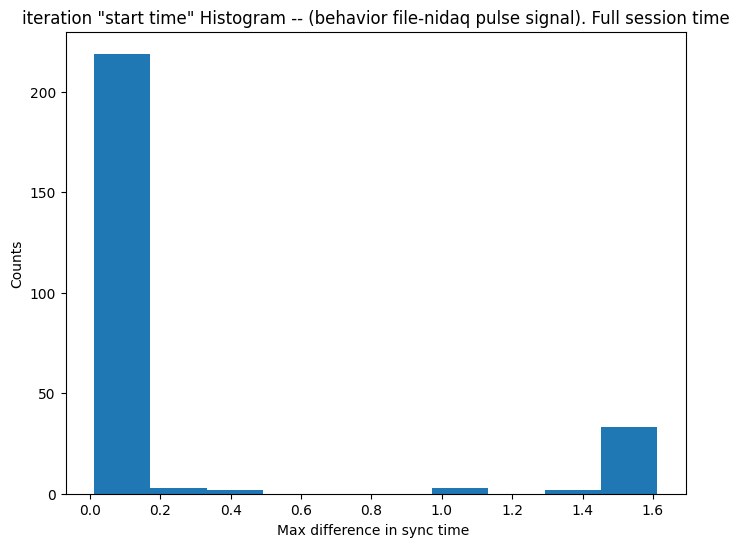

In [30]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['max_diff_time_trial_full_session'])



plt.xlabel('Max difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')



In [41]:
stats_df2 = stats_df.loc[2:,:].copy()

Text(0.5, 1.0, 'iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')

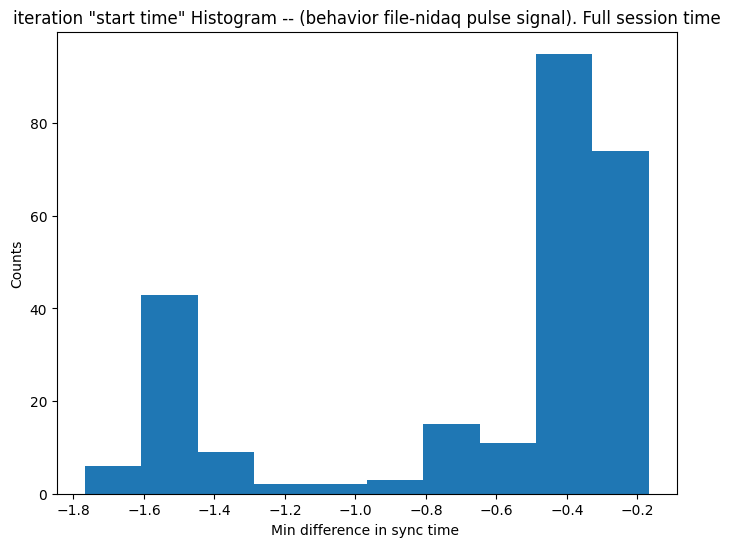

In [42]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df2['min_diff_time_trial_full_session'])



plt.xlabel('Min difference in sync time ')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- (behavior file-nidaq pulse signal). Full session time')



Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Full session time')

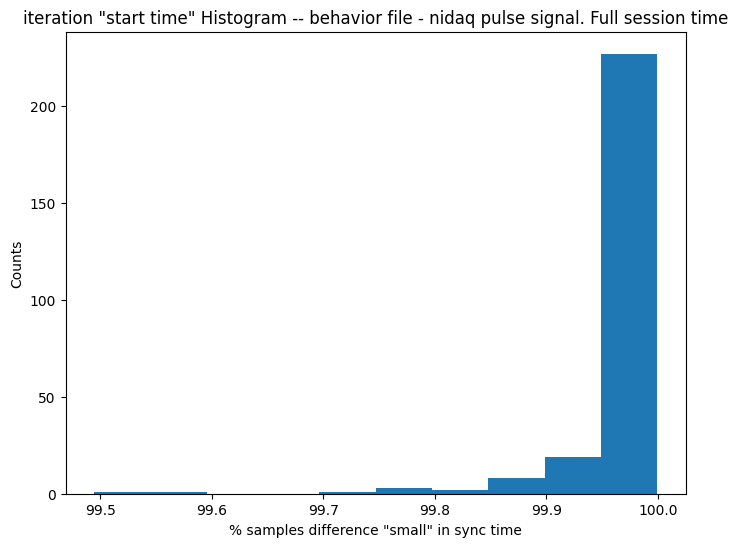

In [32]:
plt.figure(figsize=(8, 6))

plt.hist(stats_df['percent_little_diff_time_trial_full_session'])



plt.xlabel('% samples difference "small" in sync time')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Full session time')



In [35]:
stats_df = stats_df.sort_values(by='min_diff_time_trial_full_session')
stats_df = stats_df.reset_index(drop=True)
stats_df

,recording_id,subject_fullname,session_date,session_number,last_diff_trial_ind,last_diff_trial_ind_v,last_diff_trial_inds,last_diff_time_trial_full_session,last_diff_time_trial_full_session_v,max_diff_time_trial_ind,...,std_diff_time_trial_ind,std_diff_time_trial_ind_v,std_diff_time_trial_inds,std_diff_time_trial_full_session,std_diff_time_trial_full_session_v,percent_little_diff_time_trial_ind,percent_little_diff_time_trial_ind_v,percent_little_diff_time_trial_inds,percent_little_diff_time_trial_full_session,percent_little_diff_time_trial_full_session_v
0,363,ms81_M029,2024-09-03,0,-0.000644,0.009956,0.010600,0.008142,0.018742,0.001892,...,0.070744,0.072360,0.014298,0.070913,0.072491,99.994890,99.825857,99.840401,99.994890,99.830574
1,362,ms81_M029,2024-08-29,0,-0.000328,0.010672,0.011000,0.004305,0.015305,0.001198,...,0.026016,0.030576,0.015023,0.026451,0.030844,99.986710,99.854552,99.865627,99.986710,99.858613
2,446,jk8386_jk62,2025-02-08,0,-0.000980,0.025819,0.026800,0.021958,0.048757,0.024496,...,0.005191,0.015454,0.012945,0.009388,0.017644,99.985809,99.877324,99.884262,99.986124,99.653102
3,498,jk8386_jk86,2025-09-24,0,-0.000652,0.009748,0.010400,-0.005188,0.005212,0.000906,...,0.003857,0.011836,0.010373,0.009331,0.014226,99.996187,99.900226,99.905310,99.996187,99.901497
4,556,jyanar_ya054,2026-01-02,0,0.007342,0.017143,0.009801,0.079298,0.089099,0.981944,...,0.044040,0.059112,0.047949,0.045728,0.061584,99.785517,99.489756,99.435006,99.785517,98.935486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,542,jk8386_jknpx7,2025-11-26,0,-0.016786,0.000814,0.017600,-0.031101,-0.013502,0.005937,...,0.001667,0.010606,0.009732,0.006748,0.011822,99.999755,99.874494,99.880377,99.999510,99.875719
258,592,jk8386_jknpx7,2026-01-20,0,-0.001327,0.009273,0.010600,-0.019186,-0.008586,0.000039,...,0.002236,0.016206,0.014728,0.007500,0.017081,99.999747,99.788085,99.794399,99.999747,99.788842
259,521,jk8386_jknpx6,2025-11-25,0,-0.005241,0.008558,0.013800,-0.013100,0.000700,0.013751,...,0.003147,0.018996,0.016958,0.007552,0.019758,99.999745,99.706716,99.714367,99.999745,99.708501
260,464,jk8386_jk83,2025-07-09,0,-1.006168,-0.985769,0.020400,-0.965538,-0.945138,0.012572,...,0.003152,0.015207,0.013414,0.011521,0.022893,99.996730,99.918253,99.921522,99.996730,96.873978


In [45]:
stats_df.loc[0,:]

recording_id                                            363
subject_fullname                                  ms81_M029
session_date                                     2024-09-03
session_number                                            0
last_diff_trial_ind                               -0.000644
last_diff_trial_ind_v                              0.009956
last_diff_trial_inds                                 0.0106
last_diff_time_trial_full_session                  0.008142
last_diff_time_trial_full_session_v                0.018742
max_diff_time_trial_ind                            0.001892
max_diff_time_trial_ind_v                          0.027451
max_diff_time_trial_inds                             0.0286
max_diff_time_trial_full_session                   0.040053
max_diff_time_trial_full_session_v                 0.063802
min_diff_time_trial_ind                          -31.857907
min_diff_time_trial_ind_v                        -31.851507
min_diff_time_trial_inds                

In [43]:
stats_df.loc[stats_df['last_diff_trial_ind']<-1,:]

,recording_id,subject_fullname,session_date,session_number,last_diff_trial_ind,last_diff_trial_ind_v,last_diff_trial_inds,last_diff_time_trial_full_session,last_diff_time_trial_full_session_v,max_diff_time_trial_ind,...,std_diff_time_trial_ind,std_diff_time_trial_ind_v,std_diff_time_trial_inds,std_diff_time_trial_full_session,std_diff_time_trial_full_session_v,percent_little_diff_time_trial_ind,percent_little_diff_time_trial_ind_v,percent_little_diff_time_trial_inds,percent_little_diff_time_trial_full_session,percent_little_diff_time_trial_full_session_v
0,506,jyanar_ya054,2025-10-18,0,-22.327404,2.322190e-07,-22.327404,-22.344406,-0.017002,0.039753,...,0.086419,0.000010,0.086419,0.086649,0.011340,94.705409,100.0,94.749242,88.402089,100.000000
1,556,jyanar_ya054,2026-01-02,0,-2.857303,1.791876e-06,-2.857305,-2.810501,0.046804,0.099363,...,0.062627,0.000010,0.062627,0.062616,0.012072,98.301631,100.0,98.301631,0.013546,0.560479
5,581,jyanar_ya054,2026-01-14,0,-1.646152,2.024060e-05,-1.646172,-1.611761,0.034411,0.088290,...,0.061390,0.000010,0.061390,0.061448,0.013099,98.409955,100.0,98.409955,0.005540,0.550145
6,553,jyanar_ya062,2026-01-02,0,-1.546769,7.449759e-06,-1.546776,-1.510351,0.036425,0.088832,...,0.058467,0.000010,0.058467,0.058461,0.012536,97.412620,100.0,97.413749,0.009598,0.588836
7,555,jyanar_ya062,2026-01-04,0,-1.555711,7.759093e-06,-1.555719,-1.517507,0.038212,0.089917,...,0.058572,0.000010,0.058572,0.058585,0.012129,98.110039,100.0,98.110039,0.007325,0.586598
8,580,jyanar_ya062,2026-01-14,0,-1.152930,2.446874e-05,-1.152954,-1.128288,0.024666,0.083840,...,0.057767,0.000010,0.057767,0.057777,0.013344,97.205223,100.0,97.208869,0.020833,4.492164
11,564,jyanar_ya062,2026-01-06,0,-1.419399,2.957339e-05,-1.419429,-1.377114,0.042315,0.087918,...,0.060434,0.000010,0.060434,0.060418,0.011438,97.554553,100.0,97.559650,0.014158,0.647324
12,588,jyanar_ya054,2026-01-15,0,-2.798156,1.314687e-05,-2.798169,-2.743310,0.054859,0.101772,...,0.055476,0.000010,0.055476,0.055450,0.011436,98.261787,100.0,98.266118,0.004872,0.547285
13,584,jyanar_ya062,2026-01-15,0,-1.524966,2.964830e-05,-1.524996,-1.484039,0.040957,0.086603,...,0.056432,0.000010,0.056433,0.056363,0.011404,97.929664,100.0,97.931329,0.003885,0.760973
14,534,jyanar_ya054,2025-12-11,0,-1.379218,1.653662e-05,-1.379235,-1.344408,0.034827,0.090000,...,0.063533,0.000010,0.063534,0.063539,0.011878,97.542394,100.0,97.543526,0.012452,0.546198
